In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
dataset1 = pd.read_csv("electronics.csv")

In [3]:
dataset2 = pd.read_csv("modcloth.csv")

# DATA Cleaning and data preprocesing of electronics.csv dataset

In [4]:
dataset1.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


# From the dataset we can clearly see that item_id and user_id feature is of no use, so will do featute elimination for item_id and user_id feature

<AxesSubplot:>

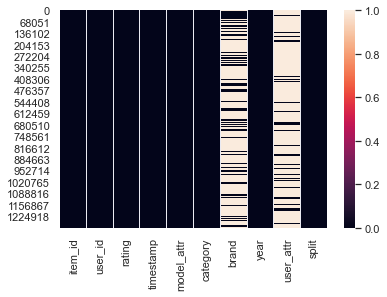

In [5]:
sns.heatmap(dataset1.isnull())

## From the above heatmap graph, we cleary come to know that brand and user_attr attribute of electronics.csv(dataset1) have lots of empty records so it is better to delete these two attibutes

In [6]:
gender_dataset1 = dataset1['model_attr']

C:\Users\nishant saini\anaconda3\envs\arthenvnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model_attr', ylabel='count'>

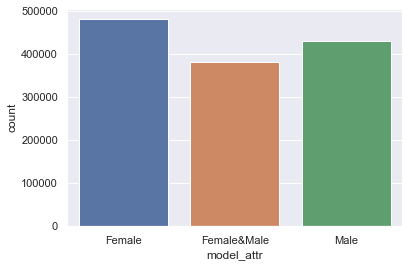

In [7]:
sns.countplot(gender_dataset1)

## From the the above graph, we come to know that gender is a categorical variable, so we will convert it into dummy variables and drop one of the dummy variable to come out of dummy variable trap

In [8]:
gender1 = pd.get_dummies(gender_dataset1, drop_first=True)

In [9]:
gender1

,Female&Male,Male
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1292949,0,0
1292950,0,0
1292951,0,0
1292952,0,1


In [10]:
category_dataset1 = dataset1['category']

<AxesSubplot:xlabel='count', ylabel='category'>

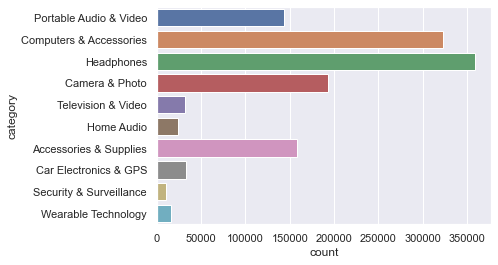

In [11]:
sns.countplot(y = category_dataset1)

In [12]:
y1 = dataset1['category']
#category1 = pd.get_dummies(category_dataset1, drop_first=True)

In [13]:
y1

0           Portable Audio & Video
1           Portable Audio & Video
2           Portable Audio & Video
3           Portable Audio & Video
4           Portable Audio & Video
                    ...           
1292949                 Headphones
1292950    Computers & Accessories
1292951    Computers & Accessories
1292952                 Headphones
1292953                 Headphones
Name: category, Length: 1292954, dtype: object

In [14]:
rating_dataset1 = dataset1['rating']

<AxesSubplot:xlabel='rating', ylabel='count'>

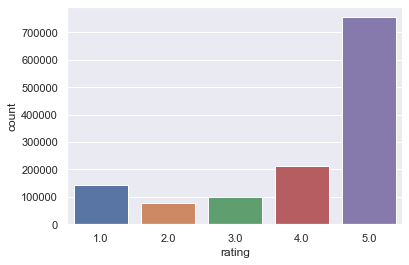

In [15]:
sns.countplot(x=rating_dataset1)

In [16]:
rating1 = pd.get_dummies(rating_dataset1,drop_first=True)

In [17]:
split_dataset1 = dataset1['split']

<AxesSubplot:xlabel='split', ylabel='count'>

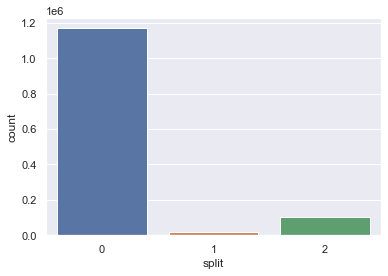

In [18]:
sns.countplot(x=split_dataset1)

# We will remove "split" attribute from dataset1(i.e from electronics.csv ) because value of split is 0 majority of time, so to save CPU time While training the model, we can remove split attribute from dataset.

In [19]:
year1 = dataset1['year']

# Now we have to create/collect all the attributes in which we have done date preprocessing and we have to create one single dataset.

In [20]:
dataset1_final = pd.concat([rating1,gender1,year1,y1],axis=1)

In [21]:
dataset1_final

,2.0,3.0,4.0,5.0,Female&Male,Male,year,category
0,0,0,0,1,0,0,1999,Portable Audio & Video
1,0,0,0,1,0,0,1999,Portable Audio & Video
2,0,1,0,0,0,0,1999,Portable Audio & Video
3,0,0,0,0,0,0,1999,Portable Audio & Video
4,1,0,0,0,0,0,1999,Portable Audio & Video
...,...,...,...,...,...,...,...,...
1292949,0,0,0,0,0,0,2017,Headphones
1292950,0,0,0,1,0,0,2017,Computers & Accessories
1292951,0,1,0,0,0,0,2016,Computers & Accessories
1292952,0,0,0,1,0,1,2018,Headphones


In [22]:
dataset1_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   2.0          1292954 non-null  uint8 
 1   3.0          1292954 non-null  uint8 
 2   4.0          1292954 non-null  uint8 
 3   5.0          1292954 non-null  uint8 
 4   Female&Male  1292954 non-null  uint8 
 5   Male         1292954 non-null  uint8 
 6   year         1292954 non-null  int64 
 7   category     1292954 non-null  object
dtypes: int64(1), object(1), uint8(6)
memory usage: 27.1+ MB


# Also we might have one or two empty records which we cann't see by heapmap graph, so it is good to run dropna() on dataset, dropna() will remove the empty records if exist in dataset.

In [23]:
dataset1_main = dataset1_final.dropna()

In [24]:
dataset1_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292954 entries, 0 to 1292953
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   2.0          1292954 non-null  uint8 
 1   3.0          1292954 non-null  uint8 
 2   4.0          1292954 non-null  uint8 
 3   5.0          1292954 non-null  uint8 
 4   Female&Male  1292954 non-null  uint8 
 5   Male         1292954 non-null  uint8 
 6   year         1292954 non-null  int64 
 7   category     1292954 non-null  object
dtypes: int64(1), object(1), uint8(6)
memory usage: 37.0+ MB


In [25]:
dataset1_main.columns

Index([2.0, 3.0, 4.0, 5.0, 'Female&Male', 'Male', 'year', 'category'], dtype='object')

In [26]:
dataset1_main

,2.0,3.0,4.0,5.0,Female&Male,Male,year,category
0,0,0,0,1,0,0,1999,Portable Audio & Video
1,0,0,0,1,0,0,1999,Portable Audio & Video
2,0,1,0,0,0,0,1999,Portable Audio & Video
3,0,0,0,0,0,0,1999,Portable Audio & Video
4,1,0,0,0,0,0,1999,Portable Audio & Video
...,...,...,...,...,...,...,...,...
1292949,0,0,0,0,0,0,2017,Headphones
1292950,0,0,0,1,0,0,2017,Computers & Accessories
1292951,0,1,0,0,0,0,2016,Computers & Accessories
1292952,0,0,0,1,0,1,2018,Headphones


# Target and predictor for dataset1

In [27]:
y1 = dataset1_main['category']

In [28]:
x1 = dataset1_main.iloc[:, :-1]

In [29]:
x1

,2.0,3.0,4.0,5.0,Female&Male,Male,year
0,0,0,0,1,0,0,1999
1,0,0,0,1,0,0,1999
2,0,1,0,0,0,0,1999
3,0,0,0,0,0,0,1999
4,1,0,0,0,0,0,1999
...,...,...,...,...,...,...,...
1292949,0,0,0,0,0,0,2017
1292950,0,0,0,1,0,0,2017
1292951,0,1,0,0,0,0,2016
1292952,0,0,0,1,0,1,2018


In [97]:
y1

0           Portable Audio & Video
1           Portable Audio & Video
2           Portable Audio & Video
3           Portable Audio & Video
4           Portable Audio & Video
                    ...           
1292949                 Headphones
1292950    Computers & Accessories
1292951    Computers & Accessories
1292952                 Headphones
1292953                 Headphones
Name: category, Length: 1292954, dtype: object

In [99]:
y1 = pd.get_dummies(y1)

In [100]:
y1

,Accessories & Supplies,Camera & Photo,Car Electronics & GPS,Computers & Accessories,Headphones,Home Audio,Portable Audio & Video,Security & Surveillance,Television & Video,Wearable Technology
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1292949,0,0,0,0,1,0,0,0,0,0
1292950,0,0,0,1,0,0,0,0,0,0
1292951,0,0,0,1,0,0,0,0,0,0
1292952,0,0,0,0,1,0,0,0,0,0


In [30]:
dataset2 = pd.read_csv("modcloth.csv")

# DATA Cleaning and data preprocesing of modcloth.csv dataset

In [31]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99893 entries, 0 to 99892
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     99893 non-null  int64  
 1   user_id     99892 non-null  object 
 2   rating      99893 non-null  int64  
 3   timestamp   99893 non-null  object 
 4   size        78133 non-null  float64
 5   fit         81387 non-null  object 
 6   user_attr   91526 non-null  object 
 7   model_attr  99893 non-null  object 
 8   category    99893 non-null  object 
 9   brand       25913 non-null  object 
 10  year        99893 non-null  int64  
 11  split       99893 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 9.1+ MB


In [32]:
dataset2.head(50)

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
5,7443,gina.chihos,5,2010-02-25 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
6,7443,Kim,2,2010-02-26 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
7,7443,jess.betcher,5,2010-03-26 07:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
8,7443,Elissa,4,2010-04-06 07:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
9,7443,Yvette,4,2010-04-08 07:00:00+00:00,NaN,NaN,Large,Small,Dresses,NaN,2012,0


# From the dataset we can clearly see that item_id and user_id feature is of no use, so will do featute elimination for item_id and user_id feature

<AxesSubplot:>

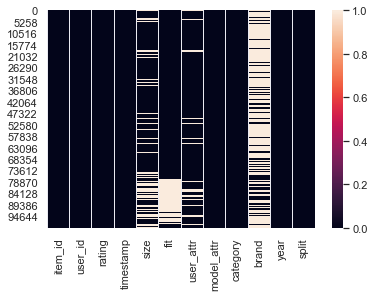

In [33]:
sns.heatmap(dataset2.isnull())

# We can clearly see from the graph that we have lots of empty values in brand, so we will remove the brand feature from the dataset.

In [34]:
rating_dataset2 = dataset2['rating']

C:\Users\nishant saini\anaconda3\envs\arthenvnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

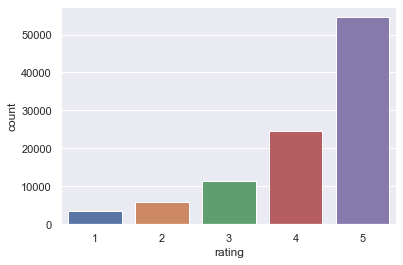

In [35]:
sns.countplot(rating_dataset2)

# From the the above graph, we come to know that rating is a categorical variable, so we will convert it into dummy variables and drop one of the dummy variable to come out of dummy variable trap

In [36]:
rating2 = pd.get_dummies(rating_dataset2,drop_first=True)

In [37]:
size_dataset2 = dataset2['model_attr']

C:\Users\nishant saini\anaconda3\envs\arthenvnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model_attr', ylabel='count'>

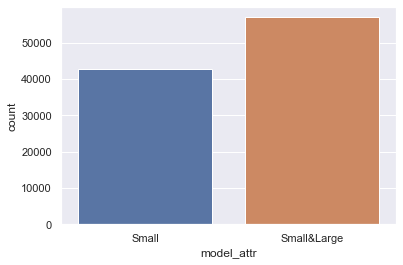

In [38]:
sns.countplot(size_dataset2)

In [39]:
size2 = pd.get_dummies(size_dataset2, drop_first=True)

In [40]:
size2

,Small&Large
0,0
1,0
2,0
3,0
4,0
...,...
99888,1
99889,1
99890,1
99891,1


In [41]:
split_dataset2 = dataset2['split']

C:\Users\nishant saini\anaconda3\envs\arthenvnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='split', ylabel='count'>

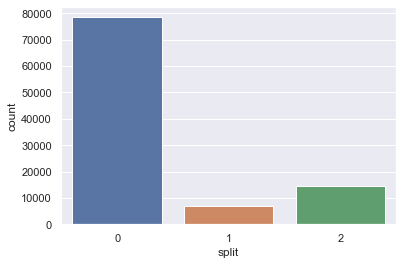

In [42]:
sns.countplot(split_dataset2)

# We will remove "split" attribute from dataset2(i.e from modcloth.csv.csv ) because value of split is 0 majority of time, so to save CPU time While training the model, we can remove split attribute from dataset.


In [43]:
year2 = dataset2['year']

In [44]:
y2 = dataset2['category']

In [45]:
fit_dataset2 = dataset2['fit']

C:\Users\nishant saini\anaconda3\envs\arthenvnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fit', ylabel='count'>

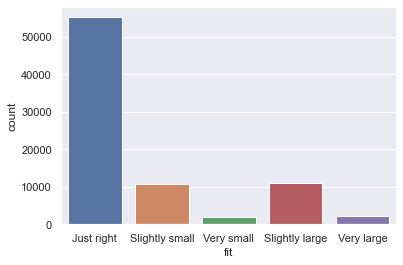

In [46]:
sns.countplot(fit_dataset2)

# We can see that in most of the cases the value of fit attribute is same(just right) and we have some null values in it, so by looking at this all we can remove the fit attribute from dataset2(ie from modcloth.csv dataset)

In [47]:
size_dataset2 = dataset2['size']

In [48]:
size_dataset2

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
99888    6.0
99889    4.0
99890    NaN
99891    NaN
99892    NaN
Name: size, Length: 99893, dtype: float64

C:\Users\nishant saini\anaconda3\envs\arthenvnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size', ylabel='count'>

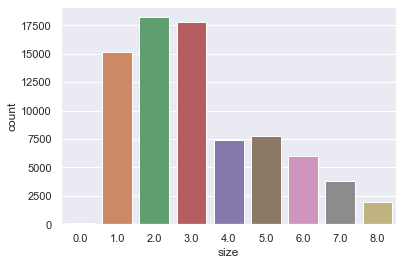

In [49]:
sns.countplot(size_dataset2)

<AxesSubplot:xlabel='rating', ylabel='size'>

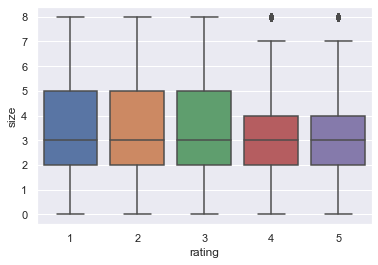

In [50]:
sns.boxplot(y='size', x='rating', data=dataset2)

# We have lots of empty feilds in  size attribute/feature, so we will use data imputation to fill up the empty values

In [51]:
# code for data imputation
def size(tuple):
    rating = tuple[1]
    size = tuple[0]
    
    
    
    if pd.isnull(size):
        if rating == 1:
            return 3
        if rating == 2:
            return 4
        if rating == 3:
            return 4
        if rating == 4:
            return 3
        if rating == 5:
            return 4
    else: 
        return size
            
        
        

In [52]:
sizer = dataset2[['size','rating']].apply(size,axis=1)
dataset2['size'] = sizer

In [53]:
dataset2

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,3.0,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,4.0,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,3.0,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,3.0,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,3.0,NaN,Small,Small,Dresses,NaN,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99888,154797,BernMarie,5,2019-06-26 21:15:13.165000+00:00,6.0,Just right,Large,Small&Large,Dresses,NaN,2017,0
99889,77949,Sam,4,2019-06-26 23:22:29.633000+00:00,4.0,Slightly small,Small,Small&Large,Bottoms,NaN,2014,2
99890,67194,Janice,5,2019-06-27 00:20:52.125000+00:00,4.0,Just right,Small,Small&Large,Dresses,NaN,2013,2
99891,71607,amy,3,2019-06-27 15:45:06.250000+00:00,4.0,Slightly small,Small,Small&Large,Outerwear,Jack by BB Dakota,2016,2


In [54]:
size_dataset2 = dataset2['size']

C:\Users\nishant saini\anaconda3\envs\arthenvnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size', ylabel='count'>

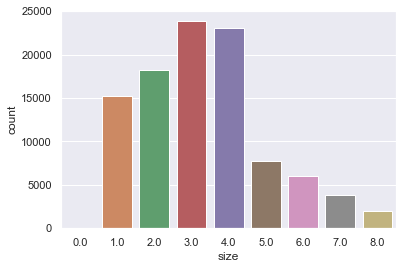

In [55]:
sns.countplot(size_dataset2)

In [56]:
size2 = pd.get_dummies(size_dataset2, drop_first=True)

In [57]:
user_attr2 = dataset2['user_attr']

In [58]:
dataset2_final = pd.concat([rating2,size2,user_attr2,size2,year2,y2],axis=1)

<AxesSubplot:>

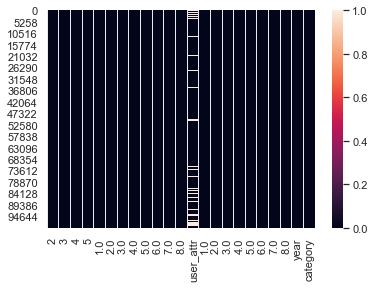

In [59]:
sns.heatmap(dataset2_final.isnull())

In [60]:
dataset2_main = dataset2_final.dropna()

<AxesSubplot:>

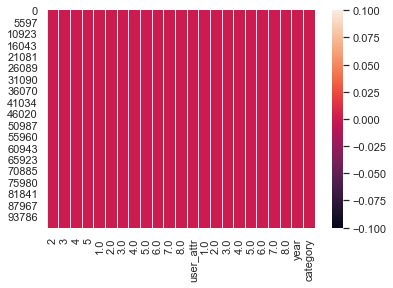

In [61]:
sns.heatmap(dataset2_main.isnull())

# Now all our the data is clean

In [62]:
dataset2_main

,2,3,4,5,1.0,2.0,3.0,4.0,5.0,6.0,...,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,year,category
0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,2012,Dresses
2,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,2012,Dresses
4,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,2012,Dresses
6,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,2012,Dresses
8,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,2012,Dresses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,2017,Dresses
99889,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,2014,Bottoms
99890,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,2013,Dresses
99891,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,2016,Outerwear


# TARGET AND PREDICTOR FOR DATASET2

In [63]:
y2 = dataset2_main['category']

In [64]:
x2 = dataset2_main.iloc[:,:-1]

In [65]:
x2

,2,3,4,5,1.0,2.0,3.0,4.0,5.0,6.0,...,user_attr,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,year
0,0,0,1,0,0,0,1,0,0,0,...,Small,0,0,1,0,0,0,0,0,2012
2,0,0,1,0,0,0,1,0,0,0,...,Small,0,0,1,0,0,0,0,0,2012
4,0,0,1,0,0,0,1,0,0,0,...,Small,0,0,1,0,0,0,0,0,2012
6,1,0,0,0,0,0,0,1,0,0,...,Small,0,0,0,1,0,0,0,0,2012
8,0,0,1,0,0,0,1,0,0,0,...,Small,0,0,1,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,0,0,0,1,0,0,0,0,0,1,...,Large,0,0,0,0,0,1,0,0,2017
99889,0,0,1,0,0,0,0,1,0,0,...,Small,0,0,0,1,0,0,0,0,2014
99890,0,0,0,1,0,0,0,1,0,0,...,Small,0,0,0,1,0,0,0,0,2013
99891,0,1,0,0,0,0,0,1,0,0,...,Small,0,0,0,1,0,0,0,0,2016


# Training model for dataset1

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.20, random_state=42)

In [103]:
X_train1.shape

(1034363, 7)

In [104]:
y_train1.shape

(1034363, 10)

In [105]:
from keras.models import Sequential

In [106]:
from keras.layers import Dense

In [107]:
model = Sequential()
model.add(Dense(50, input_dim=7, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [110]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train1,y_train1,epochs=300)

# For increasing the accuracy of model, we can do hyper parameter tuning(for example we can change no. of neurons in each layer, we can change no. of layers, we can change learning_rate, we can change optimizer etc,all these can be done to increase the accuracy of model. Being a Student i don't have enough CPU/GPU TO DO THIS KIND OF HYPER PARAMETER TUNING.)